In [25]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic', size=10)
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(6, 4)) 

from scipy.stats import randint, uniform

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score

In [26]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [27]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [29]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [31]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [32]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [33]:
train_data.describe(include='O')

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


In [34]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [35]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [36]:
train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [37]:
train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [38]:
train_data['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [39]:
train_data[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


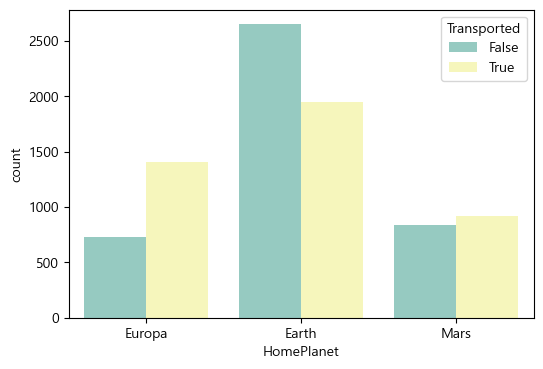

In [40]:
sns.set_palette('Set3')
sns.countplot(x='HomePlanet', hue='Transported', data=train_data);

In [41]:
train_data[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


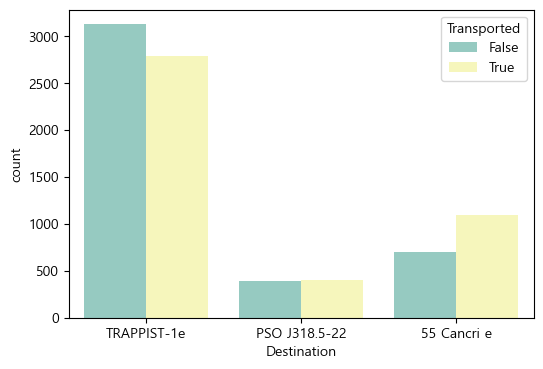

In [42]:
sns.set_palette('Set3')
sns.countplot(x='Destination', hue='Transported', data=train_data);

In [43]:
train_data[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


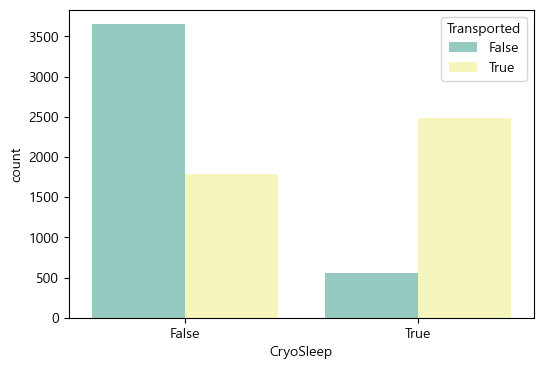

In [44]:
sns.set_palette('Set3')
sns.countplot(x='CryoSleep', hue='Transported', data=train_data);

In [45]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']

train_data[num] = num_imputer.fit_transform(train_data[num])
train_data[cat] = cat_imputer.fit_transform(train_data[cat])

test_data[num] = num_imputer.transform(test_data[num])
test_data[cat] = cat_imputer.transform(test_data[cat])

In [46]:
train_data[['Deck', 'Num', 'Side']] = train_data.Cabin.str.split('/', expand=True)
test_data[['Deck', 'Num', 'Side']] = test_data.Cabin.str.split('/', expand=True)

In [47]:
train_data['total_spent'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
test_data['total_spent'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']

In [48]:
train_data['AgeBand'] = 0
test_data['AgeBand'] = 0

for i in range(6):
    train_data.loc[(train_data.Age >= 10 * i) & (train_data.Age < 10 * (i + 1)), 'AgeBand'] = i

for i in range(6):
    test_data.loc[(test_data.Age >= 10 * i) & (test_data.Age < 10 * (i + 1)), 'AgeBand'] = i

In [49]:
train_data.drop(['Name', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [50]:
# num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spent']
cat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side', 'AgeBand']

le = LabelEncoder()

for i in cat:
    arr = np.concatenate((train_data[i], test_data[i])).astype(str)
    
    le.fit(arr)
    
    train_data[i ] = le.transform(train_data[i].astype(str))
    test_data[i] = le.transform(test_data[i].astype(str))

In [51]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,total_spent,AgeBand
PassengerId,,,,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0.0,3
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1,736.0,2
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,10383.0,5
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,5176.0,3
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1,1091.0,1


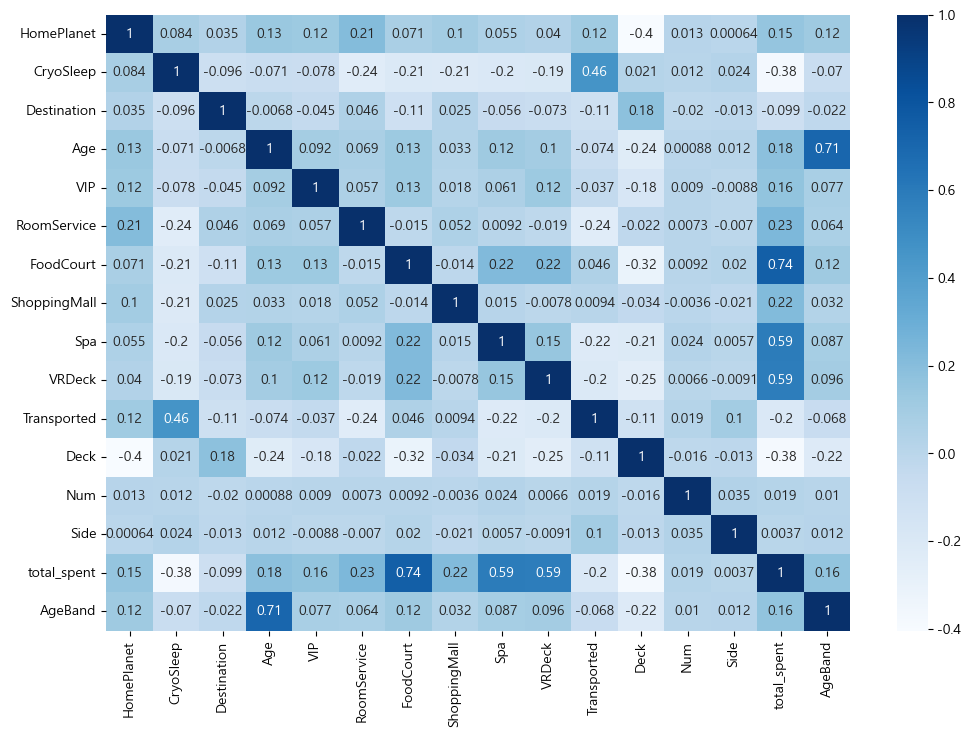

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='Blues');

In [53]:
train_data['Transported'] = train_data['Transported'].replace({True : 1, False : 0})

In [54]:
x_train = train_data.drop('Transported', axis=1)
y_train = train_data['Transported']

In [55]:
# clf = LGBMClassifier(random_state=42, n_jobs=-1)

# param_distribs = {'n_estimators': randint(1000, 1500),
#                   'learning_rate': uniform(0.01, 0.1)
#                  }

# rnd_search = RandomizedSearchCV(clf, param_distributions=param_distribs, n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
# rnd_search.fit(x_train, y_train)

# print(rnd_search.best_params_, rnd_search.best_score_)

# clf = rnd_search.best_estimator_
# proba_score = cross_val_predict(clf, x_train, y_train, cv=20, method='predict_proba', n_jobs=-1)
# print(f'{roc_auc_score(y_train, proba_score[:, 1]) * 100:.4f}')

In [56]:
# clf = GradientBoostingClassifier(random_state=42)

# param_distribs = {'n_estimators': randint(1000, 1500),
#                   'learning_rate': uniform(0.01, 0.1)
#                  }

# rnd_search = RandomizedSearchCV(clf, param_distributions=param_distribs, n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
# rnd_search.fit(x_train, y_train)

# print(rnd_search.best_params_, rnd_search.best_score_)

# clf = rnd_search.best_estimator_
# proba_score = cross_val_predict(clf, x_train, y_train, cv=20, method='predict_proba', n_jobs=-1)
# print(f'{roc_auc_score(y_train, proba_score[:, 1]) * 100:.4f}')

In [57]:
# clf = CatBoostClassifier(random_state=42, verbose=0, task_type='GPU', early_stopping_rounds=50, eval_metric='AUC')

# param_distribs = {'iterations': randint(1000, 1500),
#                   'learning_rate': uniform(0.01, 0.1)
#                  }

# rnd_search = RandomizedSearchCV(clf, param_distributions=param_distribs, n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
# rnd_search.fit(x_train, y_train)

# print(rnd_search.best_params_, rnd_search.best_score_)

# clf = rnd_search.best_estimator_
# proba_score = cross_val_predict(clf, x_train, y_train, cv=20, method='predict_proba', n_jobs=-1)
# print(f'{roc_auc_score(y_train, proba_score[:, 1]) * 100:.4f}')

In [58]:
# clf = XGBClassifier(random_state=42, tree_method='gpu_hist')

# param_distribs = {'n_estimators': randint(1000, 1500),
#                   'learning_rate': uniform(0.01, 0.1)
#                  }

# rnd_search = RandomizedSearchCV(clf, param_distributions=param_distribs, n_iter=50, cv=5, scoring='roc_auc', random_state=42, verbose=3)
# rnd_search.fit(x_train, y_train)

# print(rnd_search.best_params_, rnd_search.best_score_)

# clf = rnd_search.best_estimator_
# proba_score = cross_val_predict(clf, x_train, y_train, cv=20, method='predict_proba', n_jobs=-1)
# print(f'{roc_auc_score(y_train, proba_score[:, 1]) * 100:.4f}')

In [59]:
voting_clf_1 = VotingClassifier( 
    estimators=[('cat', CatBoostClassifier(iterations=2374, learning_rate=0.0132421521, verbose=0, random_seed=42)),
                ('lgbm', LGBMClassifier(learning_rate=0.011326496115986653, n_estimators=1088, random_state=42)),
                ('gbc', GradientBoostingClassifier(learning_rate=0.01343885211152184, n_estimators=1205, random_state=42))],
    voting='soft', n_jobs=-1)

voting_clf_1.fit(x_train, y_train)

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x0000025F15FA2C10>),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.011326496115986653,
                                             n_estimators=1088,
                                             random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01343885211152184,
                                                         n_estimators=1205,
                                                         random_state=42))],
                 n_jobs=-1, voting='soft')

In [60]:
voting_clf_2 = VotingClassifier(
    estimators=[('cat', CatBoostClassifier(iterations=2374, learning_rate=0.0132421521, verbose=0, random_seed=42)),
                ('lgbm', LGBMClassifier(learning_rate=0.011326496115986653, n_estimators=1088, random_state=42)),
                ('gbc', GradientBoostingClassifier(learning_rate=0.01343885211152184, n_estimators=1205, random_state=42)),
                ('xgb', XGBClassifier(learning_rate=0.01343885211152184, n_estimators=1205, random_state=42))],
    voting='soft', n_jobs=-1)

voting_clf_2.fit(x_train, y_train)

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x0000025F15F71E50>),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.011326496115986653,
                                             n_estimators=1088,
                                             random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01343885211152184,
                                                         n_estimators=1205,
                                                         random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            call...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01343885211152184,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=1205, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...))],
                 n_jobs=-1, voting='soft')

In [61]:
clf = VotingClassifier(
    estimators=[('vt1', voting_clf_1), ('vt2', voting_clf_2)],
    voting='soft', n_jobs=-1)

clf.fit(x_train, y_train)

VotingClassifier(estimators=[('vt1',
                              VotingClassifier(estimators=[('cat',
                                                            <catboost.core.CatBoostClassifier object at 0x0000025F15FA2C10>),
                                                           ('lgbm',
                                                            LGBMClassifier(learning_rate=0.011326496115986653,
                                                                           n_estimators=1088,
                                                                           random_state=42)),
                                                           ('gbc',
                                                            GradientBoostingClassifier(learning_rate=0.01343885211152184,
                                                                                       n_estimators=1205,
                                                                                       random_state=42))],
                                               n_jobs=-1, voting=...
                                                                          interaction_constraints=None,
                                                                          learning_rate=0.01343885211152184,
                                                                          max_bin=None,
                                                                          max_cat_threshold=None,
                                                                          max_cat_to_onehot=None,
                                                                          max_delta_step=None,
                                                                          max_depth=None,
                                                                          max_leaves=None,
                                                                          min_child_weight=None,
                                                                          missing=nan,
                                                                          monotone_constraints=None,
                                                                          n_estimators=1205,
                                                                          n_jobs=None,
                                                                          num_parallel_tree=None,
                                                                          predictor=None,
                                                                          random_state=42, ...))],
                                               n_jobs=-1, voting='soft'))],
                 n_jobs=-1, voting='soft')

In [62]:
y_pred = clf.predict(test_data)

In [63]:
submission = pd.DataFrame({
    'PassengerId': test_data.index,
    'Transported': y_pred.astype(bool)
    })

submission.to_csv('submission.csv', index=False)